In [1]:
import pandas as pd
from re import search
import plotly.express as px
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
xls = pd.ExcelFile('OpenBarre_QUEST_cleaned.xlsx')
fb_page_reach = pd.read_excel(xls, 'FB Page Reach')
ig_page_reach = pd.read_excel(xls, 'IG Page Reach')
fb_page_visits = pd.read_excel(xls, 'FB Page Visits')
ig_prof_visits = pd.read_excel(xls, 'IG Profile Visits')
new_fb_likes = pd.read_excel(xls, 'New FB Likes')
new_ig_followers = pd.read_excel(xls, 'New IG Followers')
ads_content_insights = pd.read_excel(xls, 'Ads Content Insights')
fb_content_insights = pd.read_excel(xls, 'FB Content Insights')
ig_content_insights = pd.read_excel(xls, 'IG Content Insights')

In [3]:
fb_content_insights['Post time'] = pd.to_datetime(fb_content_insights['Post time'], format="%Y-%m-%dT%H:%M:%S")
fb_content_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Caption              470 non-null    object        
 1   Post time            476 non-null    datetime64[ns]
 2   Reach                476 non-null    int64         
 3   Likes and reactions  476 non-null    int64         
 4   Sticker taps         0 non-null      float64       
 5   Replies              0 non-null      float64       
 6   Link clicks          476 non-null    int64         
 7   Comments             476 non-null    int64         
 8   Shares               476 non-null    int64         
 9   Results              0 non-null      float64       
 10  Cost per result      1 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 41.0+ KB


In [4]:
def time_in_range(start, end, current):
    return start <= current < end


column_names = ["Caption", "Time range", "Reach", "Likes and reactions", "Link clicks"]
fb_content_insights_vstime = pd.DataFrame(columns = column_names)
fb_content_insights_vstime

for index, row in fb_content_insights.iterrows():
  curr_time = row['Post time'].time()
  if time_in_range(datetime.time(0, 0, 0), datetime.time(5, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '0-6', row['Reach'], row['Likes and reactions'], row['Link clicks']]
  elif time_in_range(datetime.time(6, 0, 0), datetime.time(8, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '6-9', row['Reach'], row['Likes and reactions'], row['Link clicks']]
  elif time_in_range(datetime.time(9, 0, 0), datetime.time(11, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '9-12', row['Reach'], row['Likes and reactions'], row['Link clicks']]
  elif time_in_range(datetime.time(12, 0, 0), datetime.time(14, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '12-15', row['Reach'], row['Likes and reactions'], row['Link clicks']]
  elif time_in_range(datetime.time(15, 0, 0), datetime.time(17, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '15-18', row['Reach'], row['Likes and reactions'], row['Link clicks']]
  elif time_in_range(datetime.time(18, 0, 0), datetime.time(20, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '18-21', row['Reach'], row['Likes and reactions'], row['Link clicks']]
  elif time_in_range(datetime.time(21, 0, 0), datetime.time(23, 59, 59), curr_time):
    fb_content_insights_vstime.loc[len(fb_content_insights_vstime.index)] = [row['Caption'], '21-24', row['Reach'], row['Likes and reactions'], row['Link clicks']]

fb_content_insights_vstime

,Caption,Time range,Reach,Likes and reactions,Link clicks
0,Join us at the barre for a FREE first class& \...,12-15,98,1,0
1,The Community Director at OpenBarre is a part ...,18-21,910,11,15
2,"SO CLOSE to bringing back those smiles, hugs, ...",12-15,125,3,18
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,12-15,286,13,9
4,"T'who_x0019_ s an OpenBarre class for, really?...",6-9,948,7,16
...,...,...,...,...,...
471,HUGE congrats to Beth Giunta for 200 classes w...,6-9,509,84,189
472,"Tickets are non-refundable, but can be transf...",6-9,0,5,0
473,"WeWork freebies at OpenBarre this Friday, 10/1...",15-18,0,0,0
474,It's day one of #sundayscaries at OpenBarre! T...,9-12,0,5,0


In [5]:
col_names = ['Caption', 'Time range', 'Reach', 'Likes and reactions', 'Link clicks', 'Congrat', '@']
fb_content_insights_vstags = pd.DataFrame(columns = col_names)

for index, row in fb_content_insights_vstime.iterrows():
  curr_caption = str(row['Caption'])
  if '@' in curr_caption and ('Congrat' in curr_caption or 'congrat' in curr_caption) and '@gmail' not in curr_caption:
    fb_content_insights_vstags.loc[len(fb_content_insights_vstags.index)] = [row['Caption'], row['Time range'], row['Reach'], row['Likes and reactions'], row['Link clicks'], 1, 1]
  elif 'Congrat' in curr_caption or 'congrat' in curr_caption:
    fb_content_insights_vstags.loc[len(fb_content_insights_vstags.index)] = [row['Caption'], row['Time range'], row['Reach'], row['Likes and reactions'], row['Link clicks'], 1, 0]
  elif '@' in curr_caption and '@gmail' not in curr_caption:
    fb_content_insights_vstags.loc[len(fb_content_insights_vstags.index)] = [row['Caption'], row['Time range'], row['Reach'], row['Likes and reactions'], row['Link clicks'], 0, 1]
  else:
    fb_content_insights_vstags.loc[len(fb_content_insights_vstags.index)] = [row['Caption'], row['Time range'], row['Reach'], row['Likes and reactions'], row['Link clicks'], 0, 0]

fb_content_insights_vstags

,Caption,Time range,Reach,Likes and reactions,Link clicks,Congrat,@
0,Join us at the barre for a FREE first class& \...,12-15,98,1,0,0,0
1,The Community Director at OpenBarre is a part ...,18-21,910,11,15,0,0
2,"SO CLOSE to bringing back those smiles, hugs, ...",12-15,125,3,18,0,1
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,12-15,286,13,9,0,0
4,"T'who_x0019_ s an OpenBarre class for, really?...",6-9,948,7,16,0,0
...,...,...,...,...,...,...,...
471,HUGE congrats to Beth Giunta for 200 classes w...,6-9,509,84,189,1,0
472,"Tickets are non-refundable, but can be transf...",6-9,0,5,0,0,0
473,"WeWork freebies at OpenBarre this Friday, 10/1...",15-18,0,0,0,0,0
474,It's day one of #sundayscaries at OpenBarre! T...,9-12,0,5,0,0,0


In [8]:
col_names = ['Caption', 'Time range', 'Reach', 'Likes and reactions', 'Link clicks', 'Congrat', '@', 'Sign up', 'Reminder', 'Register', 'You', 'Question', 'Bday', 'Community', 'Family', 'Strength', 'Support']
fb_content_insights_vsbuzz = pd.DataFrame(columns = col_names)

row_counter = 0

for index, row in fb_content_insights_vstags.iterrows():
  curr_caption = str(row['Caption'])
  fb_content_insights_vsbuzz.loc[len(fb_content_insights_vsbuzz.index)] = [row['Caption'], row['Time range'], row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Congrat'], row['@'], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  if 'Sign up' in curr_caption or 'sign up' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Sign up'] = 1
  if 'Reminder' in curr_caption or 'reminder' in curr_caption or 'Remind' in curr_caption or 'remind' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Reminder'] = 1
  if 'You' in curr_caption or 'you' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'You'] = 1
  if '?' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Question'] = 1
  if 'Register' in curr_caption or 'register' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Register'] = 1
  if 'Happy birthday' in curr_caption or 'happy birthday' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Bday'] = 1
  if 'Community' in curr_caption or 'community' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Community'] = 1
  if 'Family' in curr_caption or 'family' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Family'] = 1
  if 'Strength' in curr_caption or 'strength' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Strength'] = 1
  if 'Support' in curr_caption or 'support' in curr_caption:
    fb_content_insights_vsbuzz.at[row_counter, 'Support'] = 1
  row_counter += 1




fb_content_insights_vsbuzz.head()

,Caption,Time range,Reach,Likes and reactions,Link clicks,Congrat,@,Sign up,Reminder,Register,You,Question,Bday,Community,Family,Strength,Support
0,Join us at the barre for a FREE first class& \...,12-15,98,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,The Community Director at OpenBarre is a part ...,18-21,910,11,15,0,0,0,0,0,1,0,0,1,0,0,1
2,"SO CLOSE to bringing back those smiles, hugs, ...",12-15,125,3,18,0,1,0,1,0,1,1,0,0,0,0,0
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,12-15,286,13,9,0,0,1,0,0,1,0,0,0,0,0,0
4,"T'who_x0019_ s an OpenBarre class for, really?...",6-9,948,7,16,0,0,1,0,0,1,1,0,0,0,0,0


In [9]:
fb_content_insights['Day of week'] = fb_content_insights['Post time'].dt.weekday

fb_content_insights.head()

,Caption,Post time,Reach,Likes and reactions,Sticker taps,Replies,Link clicks,Comments,Shares,Results,Cost per result,Day of week
0,Join us at the barre for a FREE first class& \...,2021-11-03 12:13:36,98,1,NaN,NaN,0,0,0,NaN,NaN,2
1,The Community Director at OpenBarre is a part ...,2021-11-02 19:52:30,910,11,NaN,NaN,15,0,3,NaN,NaN,1
2,"SO CLOSE to bringing back those smiles, hugs, ...",2021-10-28 13:14:29,125,3,NaN,NaN,18,0,0,NaN,NaN,3
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,2021-10-24 13:54:07,286,13,NaN,NaN,9,1,0,NaN,NaN,6
4,"T'who_x0019_ s an OpenBarre class for, really?...",2021-10-19 06:05:37,948,7,NaN,NaN,16,4,1,NaN,NaN,1


In [10]:
col_names = ['Caption', 'Time range', 'Reach', 'Likes and reactions', 'Link clicks', 'Congrat', '@', 'Sign up', 'Reminder', 'Register', 'You', 'Question', 'Bday', 'Community', 'Family', 'Strength', 'Support', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Weekend', 'Day']
fb_content_insights_updated = pd.DataFrame(columns = col_names)

row_counter = 0

for index, row in fb_content_insights_vsbuzz.iterrows():
  fb_content_insights_updated.loc[len(fb_content_insights_updated.index)] = [row['Caption'], row['Time range'], row['Reach'], row['Likes and reactions'], row['Link clicks'], row['Congrat'], row['@'], row['Sign up'], row['Reminder'], row['Register'], row['You'], row['Question'], row['Bday'], row['Community'], row['Family'], row['Strength'], row['Support'], 0, 0, 0, 0, 0, 0, 0, 0, '']
  
  if fb_content_insights.at[row_counter, 'Day of week'] == 0:
    fb_content_insights_updated.at[row_counter, 'Mon'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Mon'
  if fb_content_insights.at[row_counter, 'Day of week'] == 1:
    fb_content_insights_updated.at[row_counter, 'Tue'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Tue'
  if fb_content_insights.at[row_counter, 'Day of week'] == 2:
    fb_content_insights_updated.at[row_counter, 'Wed'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Wed'
  if fb_content_insights.at[row_counter, 'Day of week'] == 3:
    fb_content_insights_updated.at[row_counter, 'Thurs'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Thurs'
  if fb_content_insights.at[row_counter, 'Day of week'] == 4:
    fb_content_insights_updated.at[row_counter, 'Fri'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Fri'
  if fb_content_insights.at[row_counter, 'Day of week'] == 5:
    fb_content_insights_updated.at[row_counter, 'Sat'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Sat'
    fb_content_insights_updated.at[row_counter, 'Weekend'] = 1
  if fb_content_insights.at[row_counter, 'Day of week'] == 6:
    fb_content_insights_updated.at[row_counter, 'Sun'] = 1
    fb_content_insights_updated.at[row_counter, 'Day'] = 'Sun'
    fb_content_insights_updated.at[row_counter, 'Weekend'] = 1
  row_counter += 1

fb_content_insights_updated

,Caption,Time range,Reach,Likes and reactions,Link clicks,Congrat,@,Sign up,Reminder,Register,...,Support,Mon,Tue,Wed,Thurs,Fri,Sat,Sun,Weekend,Day
0,Join us at the barre for a FREE first class& \...,12-15,98,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Wed
1,The Community Director at OpenBarre is a part ...,18-21,910,11,15,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Tue
2,"SO CLOSE to bringing back those smiles, hugs, ...",12-15,125,3,18,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,Thurs
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,12-15,286,13,9,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,Sun
4,"T'who_x0019_ s an OpenBarre class for, really?...",6-9,948,7,16,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,HUGE congrats to Beth Giunta for 200 classes w...,6-9,509,84,189,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Sat
472,"Tickets are non-refundable, but can be transf...",6-9,0,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Wed
473,"WeWork freebies at OpenBarre this Friday, 10/1...",15-18,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tue
474,It's day one of #sundayscaries at OpenBarre! T...,9-12,0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,Sun


In [11]:
convert_dict = {'Congrat': int,
                '@': int,
                'Reach': int,
                'Likes and reactions': int,
                'Link clicks': int,
                'Sign up': int,
                'Reminder': int,
                'Register': int,
                'You': int,
                'Question': int,
                'Bday': int,
                'Community': int,
                'Family': int,
                'Strength': int,
                'Support': int,
                'Mon': int,
                'Tue': int,
                'Wed': int,
                'Thurs': int,
                'Fri': int,
                'Sat': int,
                'Sun': int,
                'Weekend': int}  

fb_content_insights_updated = fb_content_insights_updated.astype(convert_dict)
fb_content_insights_updated

,Caption,Time range,Reach,Likes and reactions,Link clicks,Congrat,@,Sign up,Reminder,Register,...,Support,Mon,Tue,Wed,Thurs,Fri,Sat,Sun,Weekend,Day
0,Join us at the barre for a FREE first class& \...,12-15,98,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Wed
1,The Community Director at OpenBarre is a part ...,18-21,910,11,15,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,Tue
2,"SO CLOSE to bringing back those smiles, hugs, ...",12-15,125,3,18,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,Thurs
3,=Ø{ÜShe_x0019_ s baaaaaack! We_x0019_ ve been ...,12-15,286,13,9,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,Sun
4,"T'who_x0019_ s an OpenBarre class for, really?...",6-9,948,7,16,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,Tue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,HUGE congrats to Beth Giunta for 200 classes w...,6-9,509,84,189,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Sat
472,"Tickets are non-refundable, but can be transf...",6-9,0,5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Wed
473,"WeWork freebies at OpenBarre this Friday, 10/1...",15-18,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Tue
474,It's day one of #sundayscaries at OpenBarre! T...,9-12,0,5,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,Sun


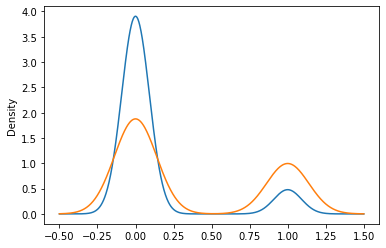

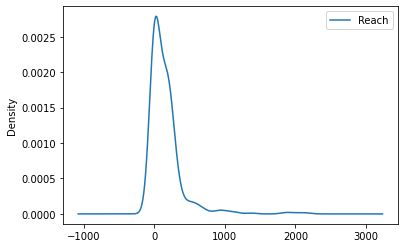

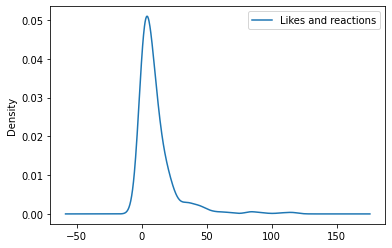

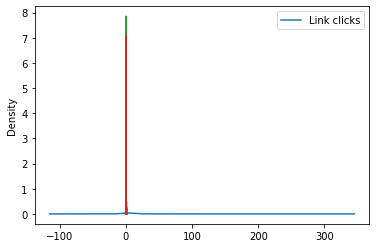

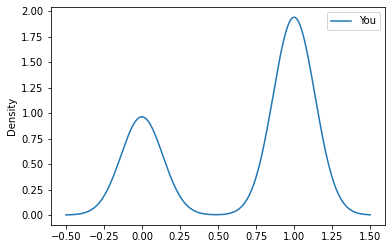

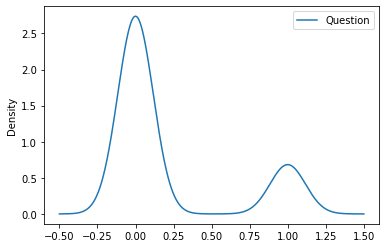

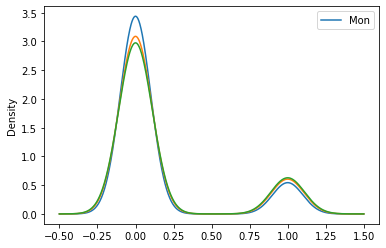

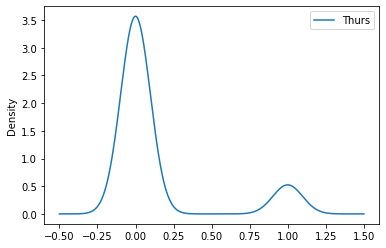

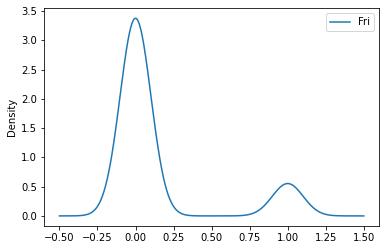

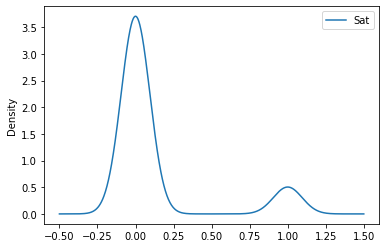

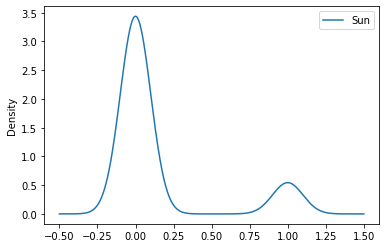

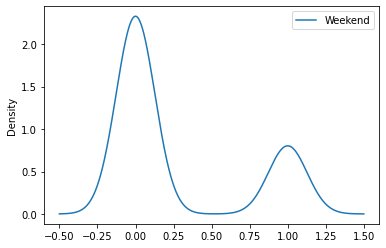

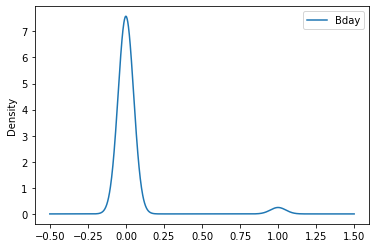

In [12]:
fb_content_insights_updated['Congrat'].plot.kde()
fb_content_insights_updated['@'].plot.kde()
fb_content_insights_updated[['Reach']].plot.kde()
fb_content_insights_updated[['Likes and reactions']].plot.kde()
fb_content_insights_updated[['Link clicks']].plot.kde()

fb_content_insights_updated['Sign up'].plot.kde()
fb_content_insights_updated['Reminder'].plot.kde()
fb_content_insights_updated['Register'].plot.kde()
fb_content_insights_updated[['You']].plot.kde()
fb_content_insights_updated[['Question']].plot.kde()
fb_content_insights_updated[['Mon']].plot.kde()
fb_content_insights_updated['Tue'].plot.kde()
fb_content_insights_updated['Wed'].plot.kde()
fb_content_insights_updated[['Thurs']].plot.kde()
fb_content_insights_updated[['Fri']].plot.kde()
fb_content_insights_updated[['Sat']].plot.kde()
fb_content_insights_updated[['Sun']].plot.kde()
fb_content_insights_updated[['Weekend']].plot.kde()
fb_content_insights_updated[['Bday']].plot.kde()



fb_content_insights_updated['ln_Congrat'] = np.log(fb_content_insights_updated['Congrat'] + 1)
fb_content_insights_updated['ln_@'] = np.log(fb_content_insights_updated['@'] + 1)
fb_content_insights_updated['ln_Reach'] = np.log(fb_content_insights_updated['Reach'] + 1)
fb_content_insights_updated['ln_Likes and reactions'] = np.log(fb_content_insights_updated['Likes and reactions'] + 1)
fb_content_insights_updated['ln_Link clicks'] = np.log(fb_content_insights_updated['Link clicks'] + 1)
fb_content_insights_updated['ln_Sign up'] = np.log(fb_content_insights_updated['Sign up'] + 1)
fb_content_insights_updated['ln_Reminder'] = np.log(fb_content_insights_updated['Reminder'] + 1)
fb_content_insights_updated['ln_Register'] = np.log(fb_content_insights_updated['Register'] + 1)
fb_content_insights_updated['ln_You'] = np.log(fb_content_insights_updated['You'] + 1)
fb_content_insights_updated['ln_Question'] = np.log(fb_content_insights_updated['Question'] + 1)

fb_content_insights_updated['ln_Bday'] = np.log(fb_content_insights_updated['Bday'] + 1)
fb_content_insights_updated['ln_Community'] = np.log(fb_content_insights_updated['Community'] + 1)
fb_content_insights_updated['ln_Family'] = np.log(fb_content_insights_updated['Family'] + 1)
fb_content_insights_updated['ln_Strength'] = np.log(fb_content_insights_updated['Strength'] + 1)
fb_content_insights_updated['ln_Support'] = np.log(fb_content_insights_updated['Support'] + 1)

fb_content_insights_updated['ln_Mon'] = np.log(fb_content_insights_updated['Mon'] + 1)
fb_content_insights_updated['ln_Tue'] = np.log(fb_content_insights_updated['Tue'] + 1)
fb_content_insights_updated['ln_Wed'] = np.log(fb_content_insights_updated['Wed'] + 1)
fb_content_insights_updated['ln_Thurs'] = np.log(fb_content_insights_updated['Thurs'] + 1)
fb_content_insights_updated['ln_Fri'] = np.log(fb_content_insights_updated['Fri'] + 1)
fb_content_insights_updated['ln_Sat'] = np.log(fb_content_insights_updated['Sat'] + 1)
fb_content_insights_updated['ln_Sun'] = np.log(fb_content_insights_updated['Sun'] + 1)
fb_content_insights_updated['ln_Weekend'] = np.log(fb_content_insights_updated['Weekend'] + 1)







In [18]:
# 'You' good for reach
# Weekdn good for likes and reactions
# Sat good for likes and reactions
# Family good for likes and reactions
# Make pie charts of stats vs days of week


ind_var_arr = ['ln_Community', 'ln_Support', 'ln_Strength']        # ['ln_Congrat', 'ln_@', 'ln_Sat', 'ln_Bday', 'ln_Family', 'ln_Community' , 'ln_Support']
XVar = fb_content_insights_updated[ind_var_arr]
YVar = fb_content_insights_updated[['ln_Link clicks']]
XVar.corr()

XVar = sm.add_constant(XVar)
LinearModel = sm.OLS(YVar, XVar, missing='drop').fit()
print(LinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Link clicks   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.925
Date:                Sun, 15 May 2022   Prob (F-statistic):            0.00872
Time:                        23:08:37   Log-Likelihood:                -849.84
No. Observations:                 476   AIC:                             1708.
Df Residuals:                     472   BIC:                             1724.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3158      0.069     19.145   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# no ln beyond this (for graphing), double check first


!pip install pandas_bokeh
import pandas_bokeh

In [ ]:
# for personal graph

personal_count_reach = 0
personal_count_likes = 0
personal_count_clicks = 0
nonpersonal_count_reach = 0
nonpersonal_count_likes = 0
nonpersonal_count_clicks = 0
personal = 0
nonpersonal = 0

for index, row in fb_content_insights_updated.iterrows():
  curr_caption = str(row['Caption'])

  if (('Congrat' in curr_caption or 'congrat' in curr_caption or 'Congrats' in curr_caption or 'congrats' in curr_caption) and '@' in curr_caption) or ('#openbarre family' in curr_caption or 'family' in curr_caption):
    personal_count_reach += row['Reach']
    personal_count_likes += row['Likes and reactions']
    personal_count_clicks += row['Link clicks']
    personal += 1
  else:
    nonpersonal_count_reach += row['Reach']
    nonpersonal_count_likes += row['Likes and reactions']
    nonpersonal_count_clicks += row['Link clicks']
    nonpersonal += 1


print(personal_count_reach) 
print(personal_count_likes) 
print(personal_count_clicks) 
print(nonpersonal_count_reach) 
print(nonpersonal_count_likes) 
print(nonpersonal_count_clicks) 
print(personal)
print(nonpersonal)


6308
662
779
68567
4483
4810
28
448


In [ ]:
# for core values/community related words graph
value_count_reach = 0
value_count_likes = 0
value_count_clicks = 0
nonvalue_count_reach = 0
nonvalue_count_likes = 0
nonvalue_count_clicks = 0
value = 0
nonvalue = 0

for index, row in fb_content_insights_updated.iterrows():
  curr_caption = str(row['Caption'])

  if 'Community' in curr_caption or 'community' in curr_caption or 'Support' in curr_caption or 'support' in curr_caption or 'Strength' in curr_caption or 'strength' in curr_caption:
    value_count_reach += row['Reach']
    value_count_likes += row['Likes and reactions']
    value_count_clicks += row['Link clicks']
    value += 1
  else:
    nonvalue_count_reach += row['Reach']
    nonvalue_count_likes += row['Likes and reactions']
    nonvalue_count_clicks += row['Link clicks']
    nonvalue += 1


print(value_count_reach) 
print(value_count_likes) 
print(value_count_clicks) 
print(nonvalue_count_reach) 
print(nonvalue_count_likes) 
print(nonvalue_count_clicks) 
print(value)
print(nonvalue)

9994
728
679
64881
4417
4910
34
442


In [ ]:
# for weekend vs weekday graph
weekend_count_reach = 0
weekend_count_likes = 0
weekend_count_clicks = 0
weekday_count_reach = 0
weekday_count_likes = 0
weekday_count_clicks = 0
weekend = 0
weekday = 0

for index, row in fb_content_insights_updated.iterrows():
  ans = row['Weekend']

  if ans == 1:
    weekend_count_reach += row['Reach']
    weekend_count_likes += row['Likes and reactions']
    weekend_count_clicks += row['Link clicks']
    weekend += 1
  else:
    weekday_count_reach += row['Reach']
    weekday_count_likes += row['Likes and reactions']
    weekday_count_clicks += row['Link clicks']
    weekday += 1


print(weekend_count_reach) 
print(weekend_count_likes) 
print(weekend_count_clicks) 
print(weekday_count_reach) 
print(weekday_count_likes) 
print(weekday_count_clicks) 
print(weekend)
print(weekday)

17128
1591
1365
57747
3554
4224
122
354


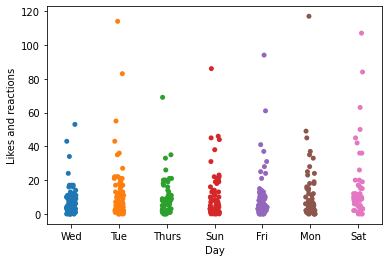

In [ ]:
ax = sns.stripplot(x="Day", y="Likes and reactions", data=fb_content_insights_updated)


ValueError: ignored

In [ ]:
pandas_bokeh.output_notebook()

In [ ]:
fb_content_insights_updated.plot_bokeh(
    kind='bar',
    x='Time range',
    y='Likes and reactions',
    xlabel='Time range',
    ylabel='Likes and Reactions',
    title='Likes and reactions by Time range'
)

Figure(id='1390', ...)